In [ ]:
%pip install yfinance
%pip install nltk
%pip install matplotlib
%pip install seaborn
%pip install wordcloud
%pip install torchvision
%pip install -U scikit-learn scipy matplotlib
%pip install pytorch-lightning
%pip install transformers

In [1]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
import tensorflow as tf
import yfinance as yf

import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
start_date ='2015-01-01'
end_date = '2022-12-31'
price = yf.download("BTC-USD", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
crypto_price_daily_2009_2023 = price.reset_index()

In [6]:
crypto_price_daily_2009_2023

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...,...
2916,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804
2917,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2918,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2919,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479


In [7]:
crypto_price_daily_2009_2023.shape

(2921, 7)

In [64]:
crypto_price_hourly_2018_2022 = pd.read_csv('../archive/BTC-Hourly.csv')

In [273]:
c =pd.read_csv('../archive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [274]:
c.shape

(4857377, 8)

In [49]:
crypto_price_hourly_2018_2022.shape

(33259, 9)

In [53]:
crypto_price_hourly_2018_2022

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,BTC/USD,43221.71,43626.49,43185.48,43312.27,5.205632e+01,2.254677e+06
1,1646089200,BTC/USD,43085.30,43364.81,42892.37,43178.98,1.068161e+02,4.612210e+06
2,1646085600,BTC/USD,41657.23,44256.08,41650.29,42907.32,5.275406e+02,2.263535e+07
3,1646082000,BTC/USD,41917.09,41917.09,41542.60,41659.53,6.975168e+01,2.905822e+06
4,1646078400,BTC/USD,41361.99,41971.00,41284.11,41914.97,2.471517e+02,1.035935e+07
...,...,...,...,...,...,...,...,...
33254,1526378400,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1.260690e+03
33255,1526374800,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,1.826200e+02
33256,1526371200,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,9.177900e+02
33257,1526367600,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,2.735800e+02


In [8]:
df = crypto_price_daily_2009_2023 #crypto_price_hourly_2018_2022.loc[:,['close']]

In [10]:
df = df.drop(['Date'],axis=1)

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume
0,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2916,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804
2917,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2918,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2919,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479


In [12]:
prediction_period = 20

In [13]:
y_hats = []

for i in reversed(range(prediction_period)):
    print(i)

    h = i + 1
    window_index = (len(df) - h)


    y_win = df[: window_index].tail(10)

    y_hats.append(y_win.mean())

19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


In [14]:
df.tail(prediction_period)

,Open,High,Low,Close,Adj Close,Volume
2901,17129.710938,17245.634766,17091.820312,17104.193359,17104.193359,14122486832
2902,17102.500000,17212.564453,16899.394531,17206.437500,17206.437500,19617581341
2903,17206.441406,17930.085938,17111.763672,17781.318359,17781.318359,26634741631
2904,17782.066406,18318.531250,17739.513672,17815.650391,17815.650391,25534481470
2905,17813.644531,17846.744141,17322.589844,17364.865234,17364.865234,20964448341
2906,17364.546875,17505.525391,16584.701172,16647.484375,16647.484375,24031608960
2907,16646.982422,16800.589844,16614.029297,16795.091797,16795.091797,14463581825
2908,16795.609375,16815.386719,16697.820312,16757.976562,16757.976562,10924354698
2909,16759.041016,16807.527344,16398.136719,16439.679688,16439.679688,17221074814
2910,16441.787109,17012.984375,16427.867188,16906.304688,16906.304688,22722096615


In [15]:
mean_absolute_error(df.tail(prediction_period), y_hats)

678477880.314572

In [51]:
crypto_price_hourly_2018_2022

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,5.205632e+01,2.254677e+06
1,1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,1.068161e+02,4.612210e+06
2,1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,5.275406e+02,2.263535e+07
3,1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,6.975168e+01,2.905822e+06
4,1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,2.471517e+02,1.035935e+07
...,...,...,...,...,...,...,...,...,...
33254,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1.260690e+03
33255,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,1.826200e+02
33256,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,9.177900e+02
33257,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,2.735800e+02


### Preprocess dataset

In [89]:
# df = df.drop(['symbol'],axis=1)

In [16]:
df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2921 non-null   float64
 1   High       2921 non-null   float64
 2   Low        2921 non-null   float64
 3   Close      2921 non-null   float64
 4   Adj Close  2921 non-null   float64
 5   Volume     2921 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.0 KB


In [57]:
import datetime

In [77]:
date_time = pd.to_datetime(crypto_price_hourly_2018_2022.pop('date'), format='%Y-%m-%d %H:%M:%S')

In [78]:
date_time

0       2022-03-01 00:00:00
1       2022-02-28 23:00:00
2       2022-02-28 22:00:00
3       2022-02-28 21:00:00
4       2022-02-28 20:00:00
                ...        
33254   2018-05-15 10:00:00
33255   2018-05-15 09:00:00
33256   2018-05-15 08:00:00
33257   2018-05-15 07:00:00
33258   2018-05-15 06:00:00
Name: date, Length: 33259, dtype: datetime64[ns]

In [79]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [80]:
day = 24 * 60 * 60
year = (365.2425) * day

In [82]:
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [17]:
column_indices = {name: i for i, name in enumerate(df.columns)}

column_indices

{'Open': 0, 'High': 1, 'Low': 2, 'Close': 3, 'Adj Close': 4, 'Volume': 5}

In [18]:
n = len(df)
n

2921

In [126]:
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [20]:
num_features = df.shape[1]

num_features

6

In [21]:
train_mean = train_df.mean()
train_std = train_df.std()

In [131]:
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [132]:
val_df

,Open,High,Low,Close,Adj Close,Volume
2044,1.795365,1.751293,1.852938,1.800418,1.800418,1.326491
2045,1.802514,1.750266,1.804418,1.756527,1.756527,1.303410
2046,1.759575,1.726847,1.842658,1.794085,1.794085,0.825305
2047,1.792275,1.728279,1.840196,1.774809,1.774809,0.818216
2048,1.773787,1.785428,1.869155,1.824625,1.824625,1.559804
...,...,...,...,...,...,...
2623,8.275342,8.301251,8.579937,8.436314,8.436314,1.530781
2624,8.443539,9.056883,8.771015,9.235269,9.235269,2.090339
2625,9.239375,8.946703,8.803388,8.608674,8.608674,1.986635
2626,8.615243,8.487035,8.679481,8.450518,8.450518,1.581367


In [81]:
from numpy import array

In [120]:
def get_train():
 seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
 seq = array(seq)
 X, y = seq[:, 0], seq[:, 1]
 X = X.reshape((5, 1, 1))
 return X, y
 
# return validation data
def get_val():
 seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
 seq = array(seq)
 X, y = seq[:, 0], seq[:, 1]
 X = X.reshape((len(X), 1, 1))
 return X, y

In [121]:
X,y = get_train()

In [134]:
y

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [123]:
y.shape

(5,)

In [97]:
def get_timeseries(df):
    seq = df.values
    seq = array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape((len(X), 1, 1))
    return X, y


In [111]:
X_train,X_test = get_timeseries(train_df)
valX,valY = get_timeseries(val_df)

In [101]:
X

array([[[-1.01962494]],

       [[-1.02119037]],

       [[-1.02100147]],

       ...,

       [[ 1.62145728]],

       [[ 1.6713155 ]],

       [[ 1.66087763]]])

In [102]:
valX

array([[[-1.01962494]],

       [[-1.02119037]],

       [[-1.02100147]],

       ...,

       [[ 1.62145728]],

       [[ 1.6713155 ]],

       [[ 1.66087763]]])

In [103]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array

Epoch 1/300
64/64 [==============================] - 3s 10ms/step - loss: 0.8612 - val_loss: 69.6866
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.2943 - val_loss: 52.8307
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 44.2653
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 39.7804
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 36.5191
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 34.0790
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 32.3295
Epoch 8/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 31.0682
Epoch 9/300
64/64 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 30.1345
Epoch 10/300
64/64 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 29.409

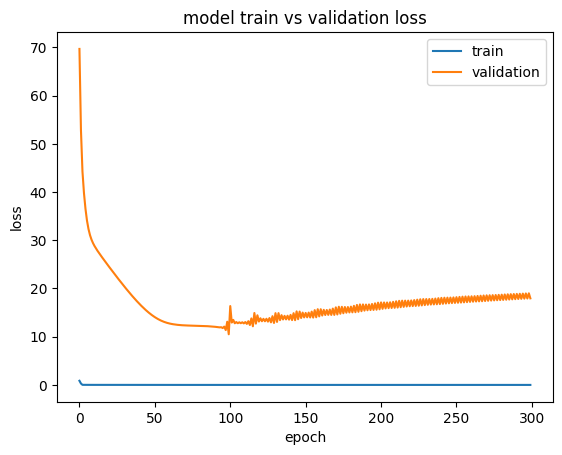

In [119]:
model = Sequential()
# model.add(LSTM(64, input_shape=(1,1)))
# model.add(Dense(1, activation='linear'))
model.add(LSTM(units=64, return_sequences=True, input_shape=(1,1)))
model.add(LSTM(units=32))
model.add(Dense(units=1))
# compile model
model.compile(loss='mse', optimizer='adam')
# fit model
history = model.fit(X, y, epochs=300, validation_data=(valX, valY), shuffle=False)
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [34]:
train_df

,Open,High,Low,Close,Adj Close,Volume
0,-1.019625,-1.017142,-1.027033,-1.021952,-1.021952,-0.684957
1,-1.021190,-1.018241,-1.027145,-1.021759,-1.021759,-0.684972
2,-1.021001,-1.018406,-1.035435,-1.030117,-1.030117,-0.682806
3,-1.029302,-1.025079,-1.041425,-1.034273,-1.034273,-0.680865
4,-1.033257,-1.027204,-1.039518,-1.031743,-1.031743,-0.681868
...,...,...,...,...,...,...
2039,1.690124,1.725583,1.761310,1.795450,1.795450,1.556498
2040,1.797556,1.782799,1.704768,1.621666,1.621666,1.671238
2041,1.621457,1.643907,1.703309,1.669109,1.669109,1.057438
2042,1.671316,1.627725,1.724168,1.659151,1.659151,1.141575


### Windows Generator

In [23]:
class WindowsGenerator():
    def __init__(self, input_width, label_width,shift, train_df,val_df,test_df,label_columns = None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}

        self.column_indices = {name: i for i,name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_windows_size = input_width + shift

        self.input_slice = slice(0,input_width)
        self.input_indices = np.arange(self.total_windows_size)[self.input_slice]

        self.label_start = self.total_windows_size - self.label_width
        self.labels_slice = slice(self.label_start,None)
        self.labe_indices = np.arange(self.total_windows_size)[self.labels_slice]

    def split_window(self,features):
        inputs = features[:, self.input_slice,:]
        labels = features[:, self.labels_slice, :]

        if self.label_columns is not None:
            labels = tf.stack([labels[:,:,self.column_indices[name]] for name in self.label_columns],axis=1)
        
        inputs.set_shape([None, self.input_width,None])
        labels.set_shape([None, self.label_width,None])

        return inputs, labels

    
    def make_dataset(self,data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(data=data,targets=None,sequence_length=self.total_windows_size,sequence_stride=1,shuffle=False,batch_size=32)

        ds = ds.map(self.split_window)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)


In [30]:
single_step_window = WindowsGenerator(input_width=1, label_width=1, shift=1,train_df=train_df,val_df=val_df,test_df=test_df,label_columns=['Close'])

In [100]:
def compile_and_fit(model,x_train,x_val, epochs=200, patience=10):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(x_train,epochs = epochs,batch_size=32,validation_data=(x_val), callbacks=[early_stopping])
    return history

In [77]:
def make_dataset(data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(data=data,targets=None,sequence_length=25,sequence_stride=1,shuffle=False,batch_size=32)

    # ds = ds.map(self.split_window)
    return ds

In [41]:

import matplotlib.pyplot as plt

In [75]:
train_df

,Open,High,Low,Close,Adj Close,Volume
0,-1.019625,-1.017142,-1.027033,-1.021952,-1.021952,-0.684957
1,-1.021190,-1.018241,-1.027145,-1.021759,-1.021759,-0.684972
2,-1.021001,-1.018406,-1.035435,-1.030117,-1.030117,-0.682806
3,-1.029302,-1.025079,-1.041425,-1.034273,-1.034273,-0.680865
4,-1.033257,-1.027204,-1.039518,-1.031743,-1.031743,-0.681868
...,...,...,...,...,...,...
2039,1.690124,1.725583,1.761310,1.795450,1.795450,1.556498
2040,1.797556,1.782799,1.704768,1.621666,1.621666,1.671238
2041,1.621457,1.643907,1.703309,1.669109,1.669109,1.057438
2042,1.671316,1.627725,1.724168,1.659151,1.659151,1.141575


In [44]:
def plot_training_history(history):
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['mean_absolute_error'], label='train_mae')
    plt.plot(history.history['val_mean_absolute_error'], label='val_mae')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

### Build a Baseline Model

In [26]:
class Baseline(tf.keras.Model):
    def __init__(self,label_index = None):
        super().__init__()
        self.label_index = label_index

    def call(self,inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:,:, self.label_index]
        return result[:,:, tf.newaxis]

In [27]:
baseline = Baseline(label_index=column_indices['Close']) 

In [ ]:
plot_training_history(compile_and_fit(baseline, single_step_window))

In [78]:
single_step_window.t

<_MapDataset element_spec=(TensorSpec(shape=(None, 1, 6), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, None), dtype=tf.float32, name=None))>

In [48]:
val_performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)

19/19 [==============================] - 0s 8ms/step - loss: 0.1582 - mean_absolute_error: 0.2709


In [49]:
val_performance

{'Baseline': [0.1581842452287674, 0.27093949913978577]}

### Create linear model

In [50]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [80]:
train_df.values

array([[-1.01962494, -1.01714231, -1.02703348, -1.02195212, -1.02195212,
        -0.68495711],
       [-1.02119037, -1.0182409 , -1.02714526, -1.02175938, -1.02175938,
        -0.68497223],
       [-1.02100147, -1.01840559, -1.03543525, -1.03011656, -1.03011656,
        -0.68280592],
       ...,
       [ 1.62145728,  1.64390668,  1.70330909,  1.66910929,  1.66910929,
         1.05743849],
       [ 1.6713155 ,  1.62772493,  1.72416753,  1.65915057,  1.65915057,
         1.14157453],
       [ 1.66087763,  1.72363268,  1.74053661,  1.79235589,  1.79235589,
         1.4133817 ]])

In [99]:
plot_training_history( compile_and_fit(linear, X,valX))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [282]:
val_performance['Linear'] = linear.evaluate(single_step_window.val)
val_performance

208/208 [==============================] - 0s 596us/step - loss: 4.6514e-04 - mean_absolute_error: 0.0195


{'Baseline': [2.4682211875915527, 1.2308413982391357],
 'Linear': [0.0004651415511034429, 0.01945582777261734]}

### Dense Model

In [61]:
dense = tf.keras.Sequential([
     tf.keras.layers.LSTM(units=64),
    # tf.keras.layers.Dense(units = 64, activation='relu'),
    # tf.keras.layers.Dense(units = 64, activation='relu'),
    tf.keras.layers.Dense(units = 1)
])

Epoch 1/200
64/64 [==============================] - 2s 11ms/step - loss: 0.5824 - mean_absolute_error: 0.6379 - val_loss: 59.0323 - val_mean_absolute_error: 6.7034
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0678 - mean_absolute_error: 0.1823 - val_loss: 43.4929 - val_mean_absolute_error: 5.5737
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0276 - mean_absolute_error: 0.0907 - val_loss: 38.6754 - val_mean_absolute_error: 5.2223
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0178 - mean_absolute_error: 0.0756 - val_loss: 35.4064 - val_mean_absolute_error: 4.9757
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0127 - mean_absolute_error: 0.0659 - val_loss: 32.9993 - val_mean_absolute_error: 4.7887
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0107 - mean_absolute_error: 0.0632 - val_loss: 31.3875 - val_mean_absolute_error: 4.6595
Epoch 7/200
64/

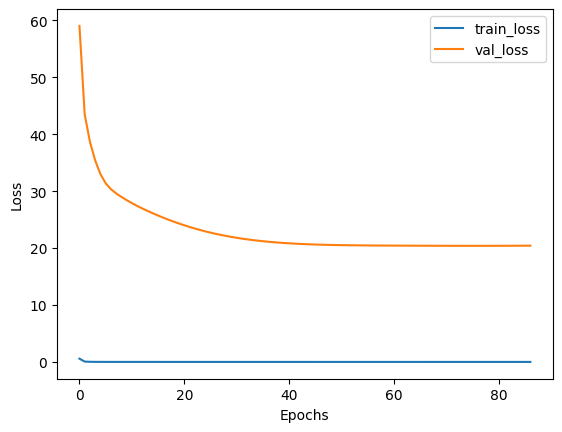

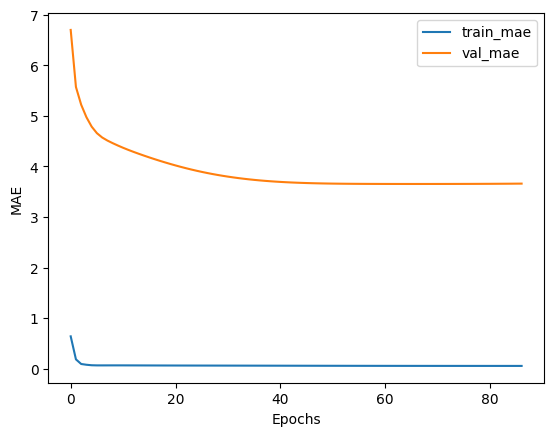

In [62]:
plot_training_history( compile_and_fit(dense, single_step_window))

In [285]:
val_performance['Dense'] = dense.evaluate(single_step_window.val)

208/208 [==============================] - 0s 711us/step - loss: 0.0043 - mean_absolute_error: 0.0628


In [286]:
val_performance

{'Baseline': [2.4682211875915527, 1.2308413982391357],
 'Linear': [0.0004651415511034429, 0.01945582777261734],
 'Dense': [0.00428706593811512, 0.06284575164318085]}

### CNN

In [ ]:
def compile_and_fit_embeddings(model,X_train, X_val, epochs=200, patience=10):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')
    model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
    history = model.fit(X_train, epochs = epochs,batch_size=32, validation_split=0.33,shuffle=False,callbacks=[early_stopping])
    return history

In [63]:
CONV_WIDTH = 3

conv_window = WindowsGenerator(input_width=CONV_WIDTH,label_width=1,shift=1,train_df=train_df,val_df=val_df,test_df=test_df,label_columns=['Close'])

In [64]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=1)
])

Epoch 1/200
64/64 [==============================] - 1s 9ms/step - loss: 0.3536 - mean_absolute_error: 0.4108 - val_loss: 0.3254 - val_mean_absolute_error: 0.4288
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0273 - mean_absolute_error: 0.0862 - val_loss: 4.6212 - val_mean_absolute_error: 1.8448
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0265 - mean_absolute_error: 0.0844 - val_loss: 0.7445 - val_mean_absolute_error: 0.6612
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0144 - mean_absolute_error: 0.0725 - val_loss: 0.4296 - val_mean_absolute_error: 0.4864
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0112 - mean_absolute_error: 0.0621 - val_loss: 0.7775 - val_mean_absolute_error: 0.6825
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0115 - mean_absolute_error: 0.0610 - val_loss: 0.8716 - val_mean_absolute_error: 0.7340
Epoch 7/200
64/64 [===

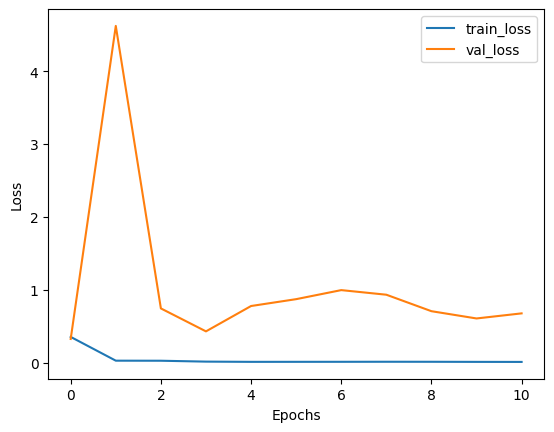

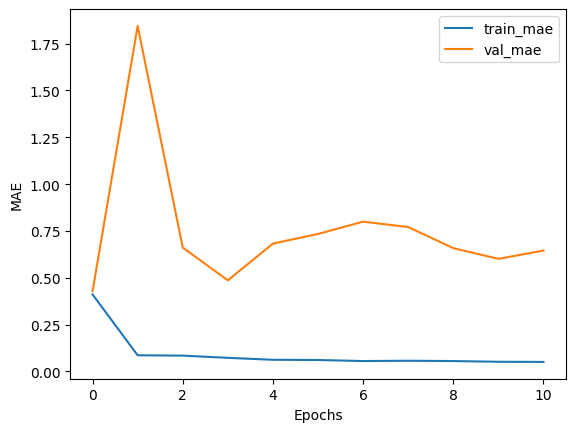

In [65]:
plot_training_history( compile_and_fit(conv_model,train_df,val_df))

In [290]:
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
val_performance


208/208 [==============================] - 0s 635us/step - loss: 0.0010 - mean_absolute_error: 0.0268


{'Baseline': [2.4682211875915527, 1.2308413982391357],
 'Linear': [0.0004651415511034429, 0.01945582777261734],
 'Dense': [0.00428706593811512, 0.06284575164318085],
 'Conv': [0.0010297620901837945, 0.026760917156934738]}

### RNN and LSTM

In [66]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32,return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [67]:
wide_window = WindowsGenerator(input_width=24, label_width=24, shift=1,train_df=train_df,val_df=val_df,test_df=test_df,label_columns=['Close'])

In [68]:
plot_training_history( compile_and_fit(lstm_model, train_df,val_df))

ValueError: in user code:

    File "C:\Users\Computing\AppData\Local\Temp\ipykernel_22312\4001016132.py", line 34, in split_window  *
        labels.set_shape([None, self.label_width,None])

    ValueError: Dimension 1 in both shapes must be equal, but are 1 and 24. Shapes are [?,1,?] and [?,24,?].


In [ ]:
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
val_performance

### Multiple output

In [ ]:
single_step_window_multiple = WindowsGenerator(input_width=1, label_width=1, shift=1,train_df=train_df,val_df=val_df,test_df=test_df)

In [ ]:
wide_step_window_multiple = WindowsGenerator(input_width=1, label_width=1, shift=1,train_df=train_df,val_df=val_df,test_df=test_df)

In [ ]:
baseline_multiple = Baseline()
baseline_multiple.compile(loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()])
val_performance={}
performance = {}
val_performance['Baseline_Multiple'] = baseline_multiple.evaluate(wide_step_window_multiple.val)

208/208 [==============================] - 1s 3ms/step - loss: 0.0739 - mean_absolute_error: 0.0763


In [ ]:
val_performance

{'Baseline_Multiple': [0.07386297732591629, 0.07626243680715561]}

In [ ]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32,return_sequences=True),
    tf.keras.layers.Dense(units=num_features)
])

In [ ]:
compile_and_fit(lstm_model,wide_window.val)

### Multiple step period

In [294]:
OUT_STEPS = 24

multi_window = WindowsGenerator(input_width=24, label_width=OUT_STEPS, shift=OUT_STEPS, train_df=train_df,val_df=val_df,test_df=test_df)

In [295]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:,-1:,:], [1, OUT_STEPS,1])

In [296]:
last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()])

In [297]:
multi_val_performance = {}
multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)

207/207 [==============================] - 1s 3ms/step - loss: 0.4612 - mean_absolute_error: 0.2545


In [298]:
multi_val_performance = {}

### Multi with linear model

In [299]:
multi_linear_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [300]:
compile_and_fit(multi_linear_model,multi_window)

multi_val_performance['linear'] = multi_linear_model.evaluate(multi_window.val)

Epoch 1/20
727/727 [==============================] - 1s 754us/step - loss: 0.3650 - mean_absolute_error: 0.4049
Epoch 2/20
727/727 [==============================] - 1s 751us/step - loss: 0.1695 - mean_absolute_error: 0.2000
Epoch 3/20
727/727 [==============================] - 1s 720us/step - loss: 0.1399 - mean_absolute_error: 0.1336
Epoch 4/20
727/727 [==============================] - 1s 742us/step - loss: 0.1329 - mean_absolute_error: 0.1073
Epoch 5/20
727/727 [==============================] - 1s 722us/step - loss: 0.1299 - mean_absolute_error: 0.0969
Epoch 6/20
727/727 [==============================] - 1s 801us/step - loss: 0.1284 - mean_absolute_error: 0.0908
Epoch 7/20
727/727 [==============================] - 1s 746us/step - loss: 0.1278 - mean_absolute_error: 0.0873
Epoch 8/20
727/727 [==============================] - 1s 771us/step - loss: 0.1276 - mean_absolute_error: 0.0853
Epoch 9/20
727/727 [==============================] - 1s 782us/step - loss: 0.1276 - mean_absolu

In [301]:
multi_val_performance

{'linear': [0.11831916868686676, 0.14774204790592194]}

In [302]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [303]:
compile_and_fit(multi_dense_model,multi_window)

Epoch 1/20
727/727 [==============================] - 1s 1ms/step - loss: 0.1409 - mean_absolute_error: 0.1323
Epoch 2/20
727/727 [==============================] - 1s 1ms/step - loss: 0.1360 - mean_absolute_error: 0.1260
Epoch 3/20
727/727 [==============================] - 1s 1ms/step - loss: 0.1305 - mean_absolute_error: 0.1191
Epoch 4/20
727/727 [==============================] - 1s 1ms/step - loss: 0.1272 - mean_absolute_error: 0.1142
Epoch 5/20
727/727 [==============================] - 1s 1ms/step - loss: 0.1245 - mean_absolute_error: 0.1107
Epoch 6/20
727/727 [==============================] - 1s 1ms/step - loss: 0.1222 - mean_absolute_error: 0.1071
Epoch 7/20
727/727 [==============================] - 1s 1ms/step - loss: 0.1201 - mean_absolute_error: 0.1025
Epoch 8/20
727/727 [==============================] - 1s 1ms/step - loss: 0.1191 - mean_absolute_error: 0.1005
Epoch 9/20
727/727 [==============================] - 1s 1ms/step - loss: 0.1180 - mean_absolute_error: 0.0992
E

In [304]:
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)

207/207 [==============================] - 0s 879us/step - loss: 0.1445 - mean_absolute_error: 0.2175


In [305]:
multi_val_performance

{'linear': [0.11831916868686676, 0.14774204790592194],
 'Dense': [0.14446008205413818, 0.21749641001224518]}

In [306]:

multi_conv_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [ ]:
compile_and_fit(multi_conv_model, multi_window)

### Process tweets

In [ ]:
tweets_2015 = pd.read_csv('../archive/data/tweets/combined_tweets_2015_labeled.csv')
tweets_2016 = pd.read_csv('../archive/data/tweets/combined_tweets_2016_labeled.csv')
tweets_2017 = pd.read_csv('../archive/data/tweets/combined_tweets_2017_labeled.csv')
tweets_2018 = pd.read_csv('../archive/data/tweets/combined_tweets_2018_labeled.csv')
tweets_2019 = pd.read_csv('../archive/data/tweets/combined_tweets_2019_apr_dec_labeled.csv')
tweets_2020 = pd.read_csv('../archive/data/tweets/combined_tweets_2020_labeled.csv')
tweets_2021 = pd.read_csv('../archive/data/tweets/combined_tweets_2021_jan_may_labeled.csv')